In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from api.utils import _read_das_npz, das_preprocess, plot_data
from api.tracking import KF_tracking

# Load visualize the das data

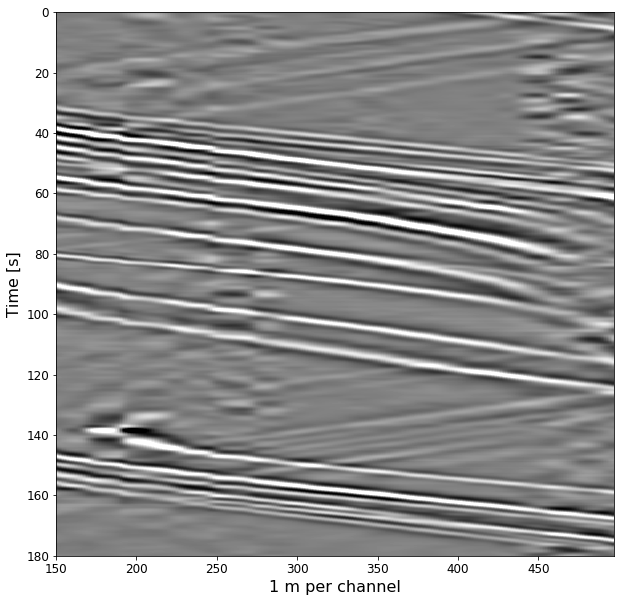

In [2]:
fname = 'dataset/test_data.npz'
data,x_axis,t_axis = _read_das_npz(fname)
data = das_preprocess(data)
plot_data(data, x_axis, t_axis, pclip=98, ax=None, figsize=(10, 10), 
                y_lim=None, x_lim=None, fig_name=None, 
                fig_dir="Fig/", fontsize=16, tickfont=12)

# Initialize the model and parameters

In [3]:
start_x = 250 # The start tracking channel
end_x = 400 # Then last tracking channel
tracking_args = {
    "detect":{
            "minprominence": 0.7,
            "minseparation": 75,
            "prominenceWindow": 600,
    }
} # Parameters for peak detection

# Initialize the tracking object
tracking = KF_tracking(data=data, t_axis=t_axis,
                       x_axis=x_axis, 
                       args=tracking_args)

# Run the algorithm

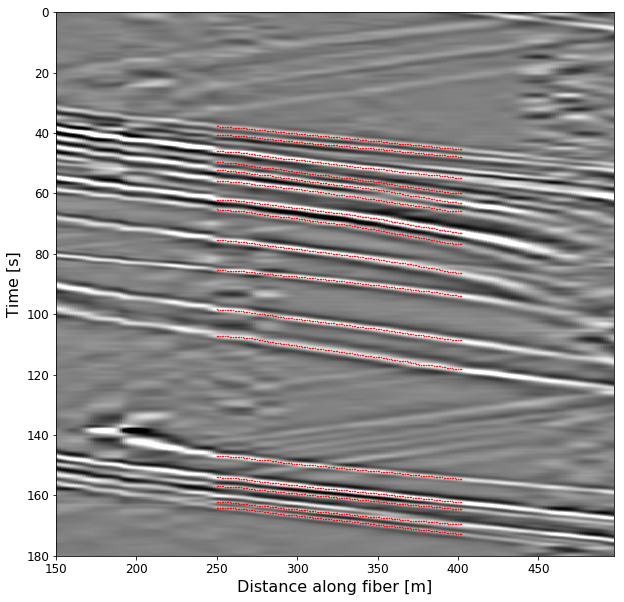

In [4]:
# Per-sensor vehicle detection
veh_base = tracking.detect_in_one_section(start_x=start_x, nx=15, sigma=0.08, show_plot=None, plt_xlim=x_axis[-1])
# Spatial-domain bayesian filtering for vehicle tracking
veh_states = tracking.tracking_with_veh_base(start_x=start_x, end_x=end_x,
                                            veh_base=veh_base, sigma_a=0.01)
# visualize the tracking results
tracking.tracking_visualization_one_section(start_x, veh_states, plt_xlim=x_axis[-1], 
                                           plt_tlim=t_axis[-1], t_min=0, ax=None, pclip=98,
                                           plot_tracking=True, plt_xlo=x_axis[0], 
                                           fontsize=16, tickfont=12, fig_dir=None, fig_name=None)